# Village consumption smoothing 

We simulate T periods of income for N individuals.  Each individual receives a base level of income plus an income shocks.  The income shocks can be independent or correlated.  

We plot income in each household with and without consumption smoothing. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

#### Default parameters

In [2]:
rho = 0   
N = 5
T = 15
V = 1

In [3]:
def shocks(rho=0, N=N, T=T):
    '''Returns an N by T matrix of multivariate normally distributed shocks with correlation rho'''
    mean = np.zeros(N)
    cov = np.ones((N, N), int)*rho*V
    np.fill_diagonal(cov, V)
    #print(cov)
    e = np.random.multivariate_normal(mean, cov, size=T)
    return e

In [4]:
def incomes(rho=0, V=V, N = N, T=T):
    '''Generates random incomes for N over T periods'''
    t = np.arange(T)   # time periods
    x0 = np.arange(10,10+N*5,5)   # average income
    e = shocks(rho=rho, N=N, T=T)*V
    X = x0 + e
    
    XT = np.sum(X, axis = 1)
    
    w = x0/np.sum(x0)
    XS = np.array([XT * wt for wt in w]).T
    
    return t, X, XS

In [5]:
def plot_cons(rho=0, V=1):
    #print('rho = {}'.format(rho))
    t, X, XS = incomes(rho=rho, V=V, N=N, T=T)
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(t, X,'x-')
    ax.plot(t,XS,linestyle='dashed')
    ax.set_xlabel('time')
    ax.set_xticks(np.arange(T, step=1))
    fig.suptitle(r'$\rho = {:0.2f}$'.format(rho))
    ax.grid()
    plt.tight_layout();

In [6]:
interact(plot_cons, rho=(-0.25,0.99,0.05));

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.99, min=-0.25, step=0.05), IntSlider(value=1, description='V', max=3, min=-1), Output()), _dom_classes=('widget-interact',))

## Examples 

We illustrate with three different scenarios.  Remember that these are random draws so will be different everytime these are run.

### independent incomes

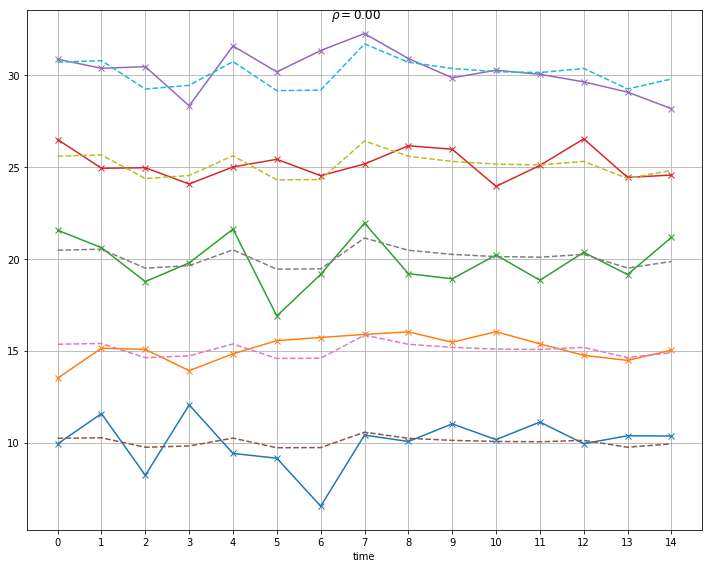

In [7]:
plot_cons(rho=0, V=1)

### Correlated incomes

Less opportunity for risk sharing. So consumption will tend to follow income. 

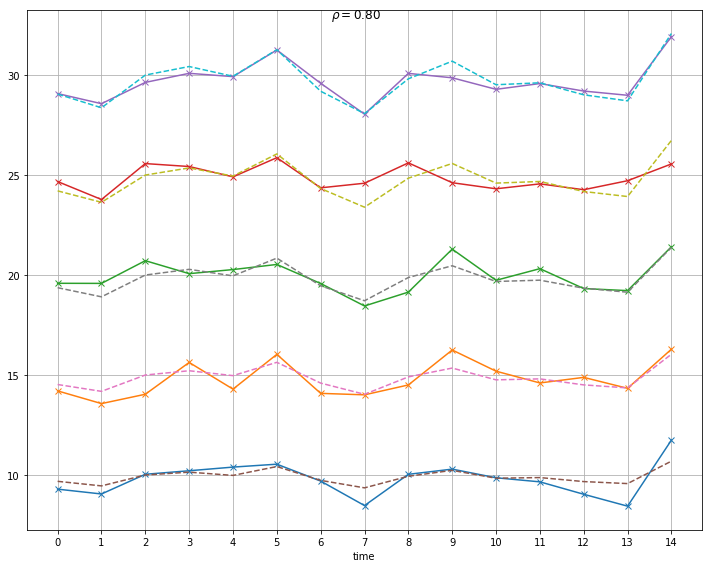

In [8]:
plot_cons(rho=0.8, V=1)

### Negatively correlated

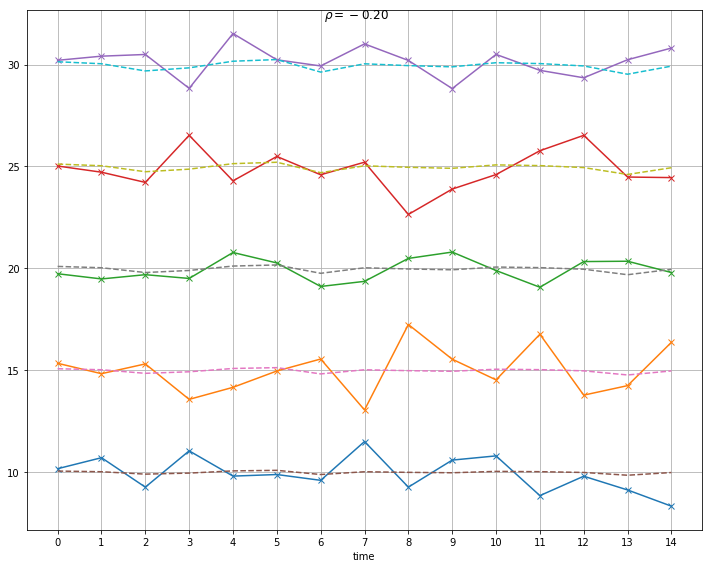

In [9]:
plot_cons(rho=-0.2, V=1)

## Unfinished explorations

In [21]:
import statsmodels.api as sm
import pandas as pd

In [11]:
t, X, XS = incomes(rho=rho, V=V, N=N, T=T)

In [12]:
X.sum(axis=1)

array([ 104.71770839,   99.34629358,   98.66158586,   99.39460043,
        101.27167855,  102.83294189,  103.15761203,   97.99955186,
        101.2564265 ,  103.06882422,  104.58257056,  103.33518449,
         98.8907937 ,   99.10210819,  100.76559088])

In [13]:
XC = XS.reshape((N*T,1))
XI = X.reshape((N*T,1))

In [14]:
model = sm.OLS(XC,XI)
results = model.fit()
results.params

array([ 1.00154704])

Another way to draw from a multivariate normal

In [15]:
from scipy.spatial.distance import cdist
import scipy.linalg as spla

In [16]:
X = np.random.normal(size=(5,1))

In [17]:
K = np.exp(-cdist(X,X,"sqeuclidean")) +1e-6* np.eye(X.shape[0])

In [18]:
mean = np.array(np.arange(10,35,5))
mean

array([10, 15, 20, 25, 30])

In [19]:
def multivariate_normal_sampler(mean, covariance, n_samples=1):
    L = spla.cholesky(covariance)
    Z = np.random.normal(size=(n_samples, covariance.shape[0]))
    return Z.dot(L) + mean

In [20]:
multivariate_normal_sampler(mean, K, 10)

array([[  9.20271399,  14.33578041,  19.75344577,  24.3366718 ,  30.877064  ],
       [ 11.27570729,  15.94150262,  21.91982675,  26.41018385,
         30.92440461],
       [ 10.07026493,  16.22963333,  19.96371768,  25.71375247,
         29.95160328],
       [  8.28066485,  16.67877513,  20.46669885,  26.44090998,
         29.83988666],
       [  8.52920126,  15.36613302,  19.72592604,  25.2901988 ,
         30.08210039],
       [  9.28160567,  14.62614954,  20.57099367,  25.14882814,
         28.73974516],
       [ 11.86887816,  15.71615971,  19.53363918,  25.3140649 ,
         29.90708927],
       [  8.93062052,  15.85811072,  19.9578206 ,  25.44958992,
         29.42066386],
       [  8.62432326,  15.26982007,  21.30000176,  25.39672058,
         30.79254143],
       [ 11.25641781,  16.20632161,  19.52778307,  25.53783968,
         30.53318715]])